<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_workflow_JupyterLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: `gget` in Jupyter Lab

[Complete gget manual](https://pachterlab.github.io/gget/)

___

In [1]:
# For pretty plots
%config InlineBackend.figure_format='retina'

Install and import gget:

In [2]:
!pip install -q gget
import gget

___

# Find reference genome metadata and download links
gget.ref automatically fetches from the latest Ensembl release, unless `release` is specified.

In [3]:
# Show manual
help(gget.ref)

Help on function ref in module gget.gget_ref:

ref(species, which='all', release=None, ftp=False, save=False, list_species=False, verbose=True)
    Fetch FTPs for reference genomes and annotations by species from Ensembl.
    
    Args:
    - species       Defines the species for which the reference should be fetched in the format "<genus>_<species>",
                    e.g. species = "homo_sapiens".
    - which         Defines which results to return.
                    Default: 'all' -> Returns all available results.
                    Possible entries are one or a combination (as a list of strings) of the following:
                    'gtf' - Returns the annotation (GTF).
                    'cdna' - Returns the trancriptome (cDNA).
                    'dna' - Returns the genome (DNA).
                    'cds - Returns the coding sequences corresponding to Ensembl genes. (Does not contain UTR or intronic sequence.)
                    'cdrna' - Returns transcript sequences corr

In [4]:
gget.ref("taeniopygia_guttata")

{'taeniopygia_guttata': {'transcriptome_cdna': {'ftp': 'http://ftp.ensembl.org/pub/release-109/fasta/taeniopygia_guttata/cdna/Taeniopygia_guttata.bTaeGut1_v1.p.cdna.all.fa.gz',
   'ensembl_release': 109,
   'release_date': '2022-12-13',
   'release_time': '18:32',
   'bytes': '26M'},
  'genome_dna': {'ftp': 'http://ftp.ensembl.org/pub/release-109/fasta/taeniopygia_guttata/dna/Taeniopygia_guttata.bTaeGut1_v1.p.dna.toplevel.fa.gz',
   'ensembl_release': 109,
   'release_date': '2022-12-13',
   'release_time': '00:08',
   'bytes': '304M'},
  'annotation_gtf': {'ftp': 'http://ftp.ensembl.org/pub/release-109/gtf/taeniopygia_guttata/Taeniopygia_guttata.bTaeGut1_v1.p.109.gtf.gz',
   'ensembl_release': 109,
   'release_date': '2022-12-16',
   'release_time': '10:20',
   'bytes': '13M'},
  'coding_seq_cds': {'ftp': 'http://ftp.ensembl.org/pub/release-109/fasta/taeniopygia_guttata/cds/Taeniopygia_guttata.bTaeGut1_v1.p.cds.all.fa.gz',
   'ensembl_release': 109,
   'release_date': '2022-12-13',
  

# Find genes using free form search words:
For gget.search to return transcripts instead of genes, define `seqtype="transcript"`.

Search for genes containing the search term "fun" in the zebra finch genome (*Taeniopygia guttata*):

In [5]:
# Show manual
help(gget.search)

Help on function search in module gget.gget_search:

search(searchwords, species, id_type='gene', seqtype=None, andor='or', limit=None, wrap_text=False, json=False, save=False, verbose=True)
    Function to query Ensembl for genes based on species and free form search terms.
    Automatically fetches results from latest Ensembl release, unless user specifies database (see 'species' argument).
    
    Args:
    - searchwords     Free form search words (not case-sensitive) as a string or list of strings
                      (e.g.searchwords = ["GABA", "gamma-aminobutyric"]).
    - species         Species can be passed in the format "genus_species", e.g. "homo_sapiens".
                      To pass a specific database, enter the name of the core database, e.g. 'mus_musculus_dba2j_core_105_1'.
                      All availabale species databases can be found here: http://ftp.ensembl.org/pub/release-106/mysql/
    - id_type         "gene" (default) or "transcript"
                     

In [6]:
# Note: No need to write out the full species name (taeniopygia_guttata), as long as only one database (for the latest Ensembl release)
# begins with the given letters
# Note: 'wrap_text' displays the data frame with wrapped text for easier reading
search_results = gget.search(searchwords="fun", species="tae", wrap_text=True)

,ensembl_id,gene_name,ensembl_description,ext_ref_description,biotype,url
0,ENSTGUG00000003915,AIMP1,aminoacyl tRNA synthetasecomplex interactingmultifunctional protein 1[Source:NCBIgene;Acc:100227419],aminoacyl tRNA synthetasecomplex interactingmultifunctional protein 1,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000003915
1,ENSTGUG00000004896,MFHAS1,malignant fibrous histiocytomaamplified sequence 1[Source:NCBIgene;Acc:100217808],multifunctional ROCO familysignaling regulator 1,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000004896
2,ENSTGUG00000004956,BFAR,bifunctional apoptosisregulator [Source:NCBIgene;Acc:100223595],bifunctional apoptosisregulator,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000004956
3,ENSTGUG00000006139,FUNDC1,FUN14 domain containing 1[Source:NCBIgene;Acc:100228946],FUN14 domain containing 1,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000006139
4,ENSTGUG00000008804,AIMP2,aminoacyl tRNA synthetasecomplex interactingmultifunctional protein 2[Source:NCBIgene;Acc:100226087],aminoacyl tRNA synthetasecomplex interactingmultifunctional protein 2,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000008804
5,ENSTGUG00000011666,None,pseudouridine-metabolizingbifunctional proteinC1861.05-like [Source:NCBIgene;Acc:100222446],None,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000011666
6,ENSTGUG00000014433,None,hydroxyacyl-CoA dehydrogenasetrifunctional multienzymecomplex subunit beta[Source:NCBIgene;Acc:115494596],None,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000014433
7,ENSTGUG00000014477,None,"trifunctional enzyme subunitalpha, mitochondrial-like[Source:NCBIgene;Acc:115494667]",None,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000014477
8,ENSTGUG00000019264,ASF1A,anti-silencing function 1Ahistone chaperone [Source:NCBIgene;Acc:100229097],,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000019264
9,ENSTGUG00000020253,None,hydroxyacyl-CoA dehydrogenasetrifunctional multienzymecomplex subunit beta[Source:NCBIgene;Acc:100226147],None,protein_coding,https://useast.ensembl.org/taeniopygia_guttata/Gene/Summary?g=ENSTGUG00000020253


# Use [Enrichr](https://maayanlab.cloud/Enrichr/) to perform an enrichment analysis on a list of genes

In [7]:
# Show manual
help(gget.enrichr)

Help on function enrichr in module gget.gget_enrichr:

enrichr(genes, database, ensembl=False, plot=False, figsize=(10, 10), ax=None, json=False, save=False, verbose=True)
    Perform an enrichment analysis on a list of genes using Enrichr (https://maayanlab.cloud/Enrichr/).
    
    Args:
    - genes       List of Entrez gene symbols to perform enrichment analysis on, passed as a list of strings, e.g. ['PHF14', 'RBM3', 'MSL1', 'PHF21A'].
                  Set 'ensembl = True' to input a list of Ensembl gene IDs, e.g. ['ENSG00000106443', 'ENSG00000102317', 'ENSG00000188895'].
    - database    Database to use as reference for the enrichment analysis.
                  Supported shortcuts (and their default database):
                  'pathway' (KEGG_2021_Human)
                  'transcription' (ChEA_2016)
                  'ontology' (GO_Biological_Process_2021)
                  'diseases_drugs' (GWAS_Catalog_2019)
                  'celltypes' (PanglaoDB_Augmented_2021)
           

In [8]:
# Define a gene list to perform the enrichment analysis on, e.g. the results from gget.search
gene_list = search_results["gene_name"].values
gene_list

array(['AIMP1', 'MFHAS1', 'BFAR', 'FUNDC1', 'AIMP2', None, None, None,
       'ASF1A', None, None, 'FUNDC2', 'TRMT112', 'MTHFD2L'], dtype=object)

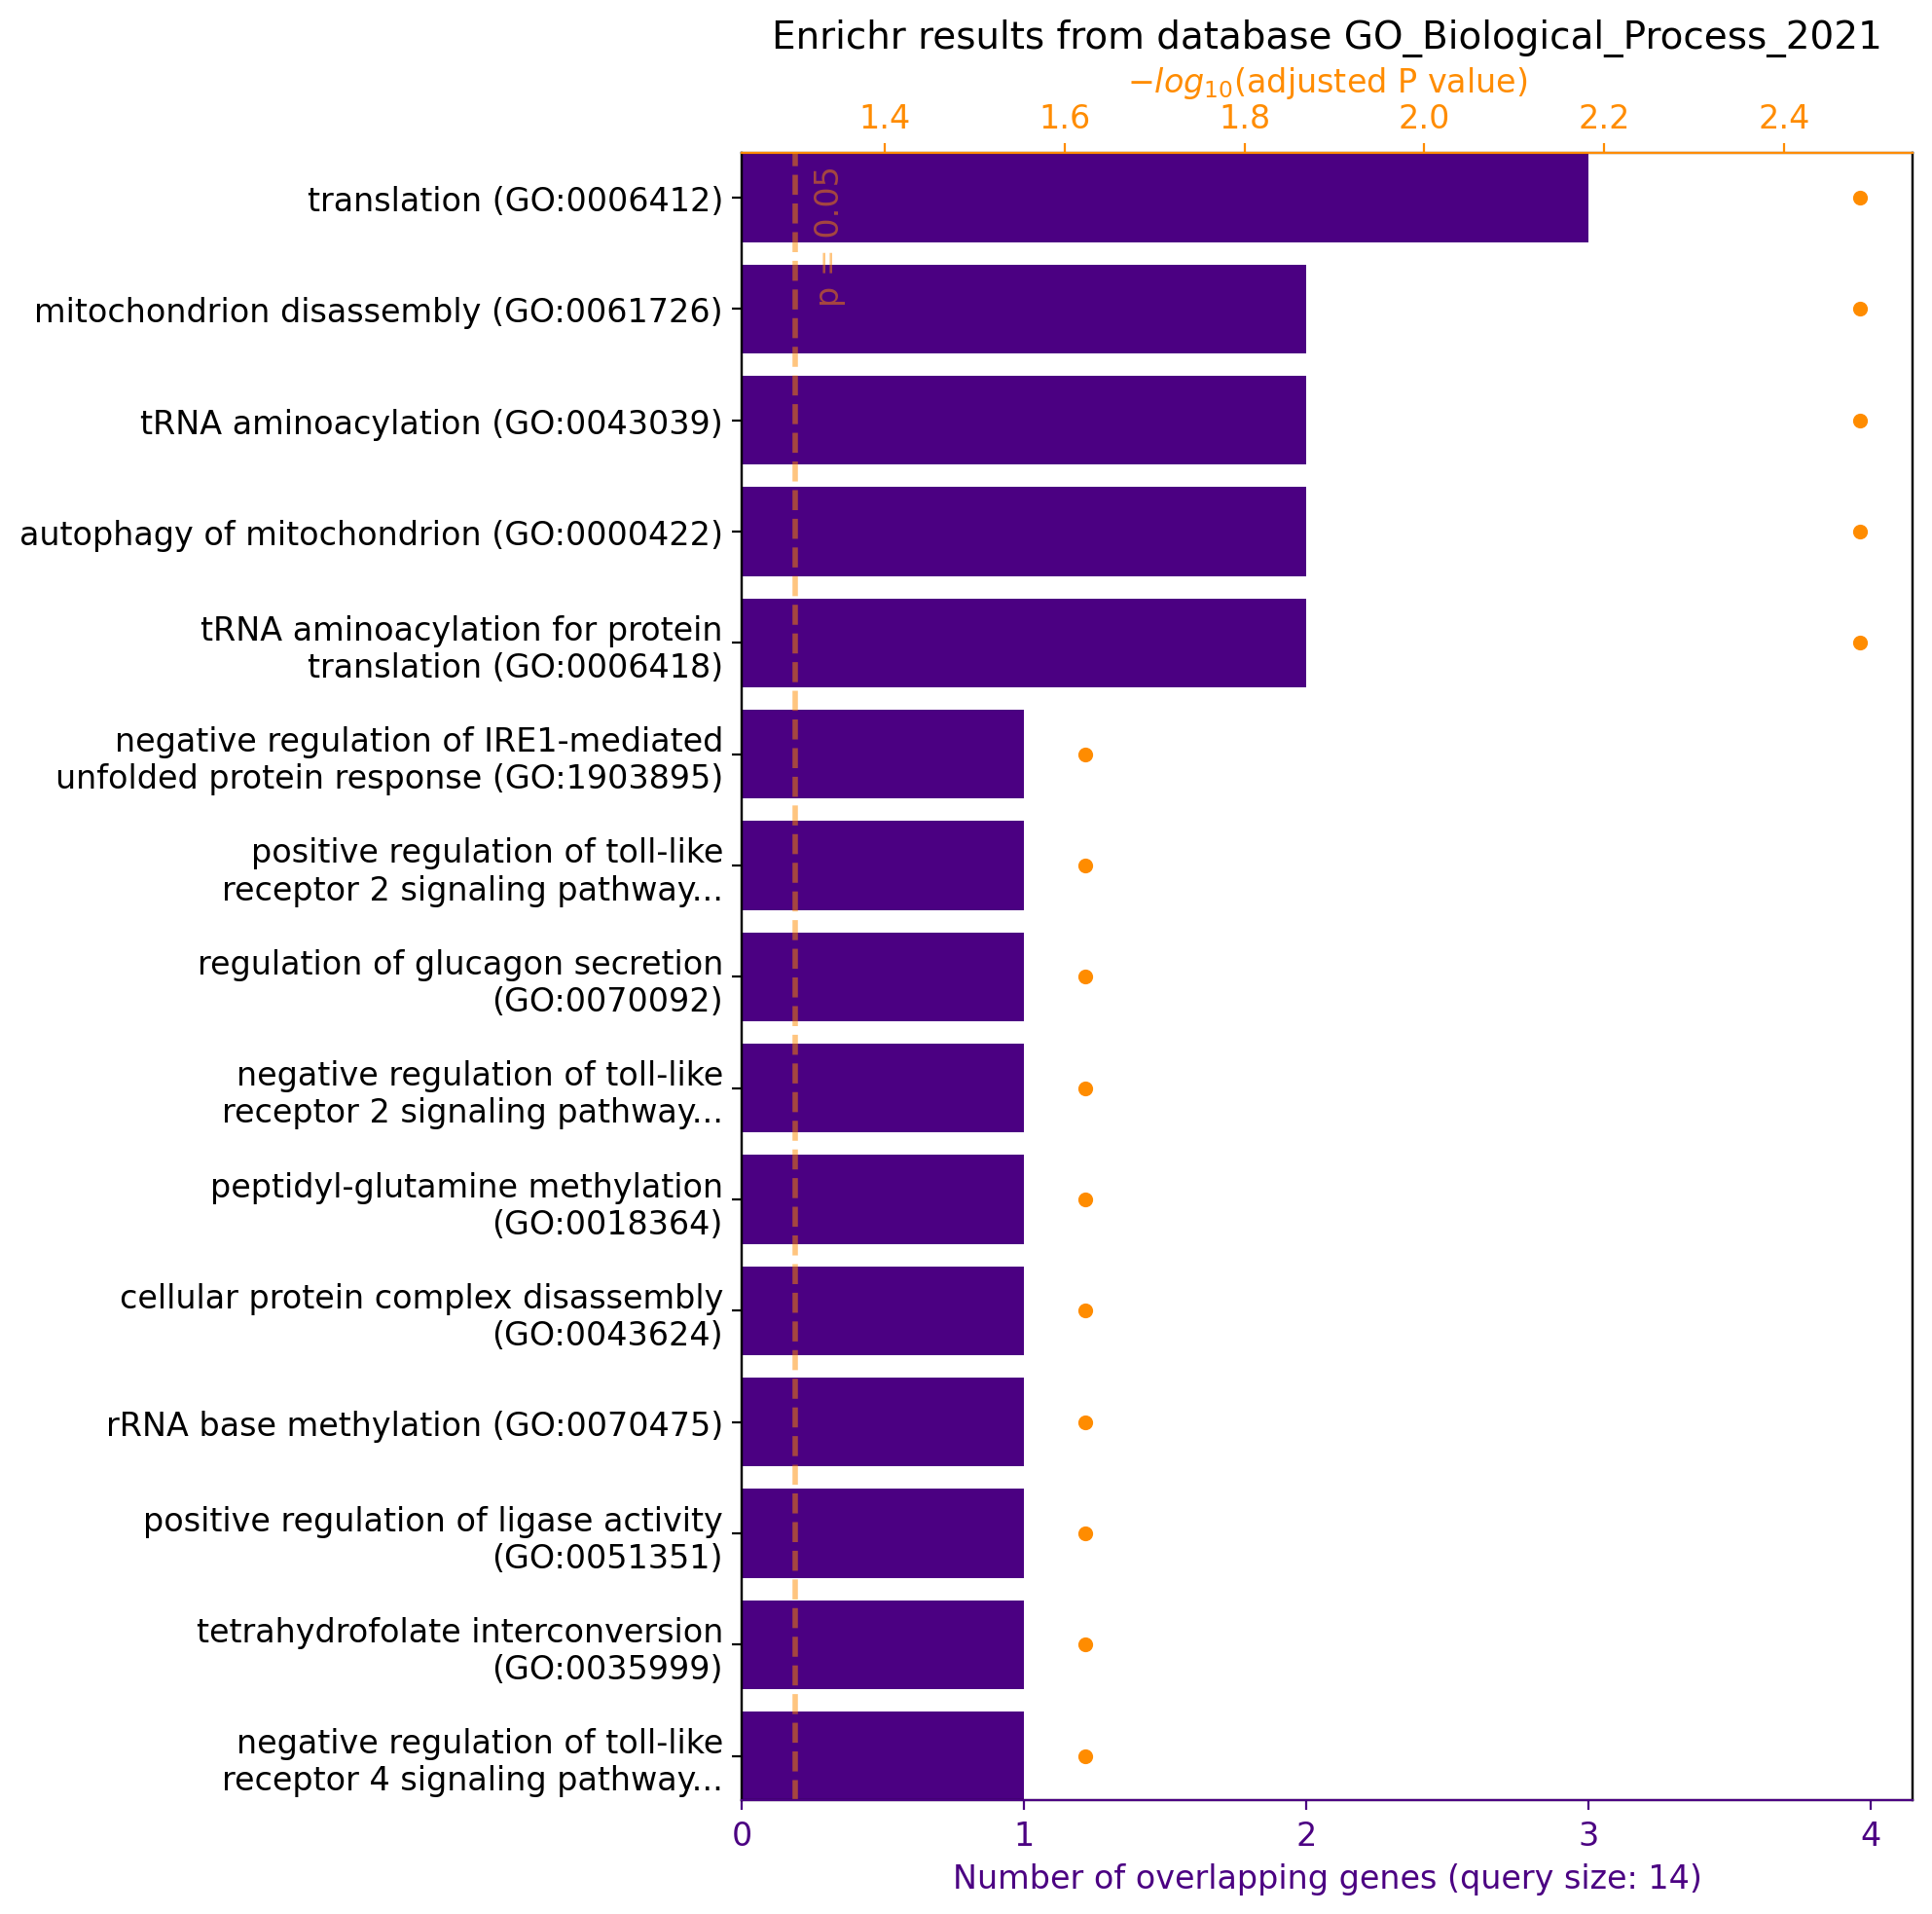

In [9]:
# plot=True displays a graphical overview of the first 15 results
enrichr_df = gget.enrichr(gene_list, database="ontology", plot=True)

In [10]:
# Show Enrichr data frame
enrichr_df

,rank,path_name,p_val,z_score,combined_score,overlapping_genes,adj_p_val,database
0,1,translation (GO:0006412),0.000097,46.872038,433.252073,"[AIMP1, AIMP2, TRMT112]",0.003284,GO_Biological_Process_2021
1,2,mitochondrion disassembly (GO:0061726),0.000113,167.705882,1524.868252,"[FUNDC2, FUNDC1]",0.003284,GO_Biological_Process_2021
2,3,tRNA aminoacylation (GO:0043039),0.000125,158.373016,1422.719267,"[AIMP1, AIMP2]",0.003284,GO_Biological_Process_2021
3,4,autophagy of mitochondrion (GO:0000422),0.000139,150.022556,1332.181235,"[FUNDC2, FUNDC1]",0.003284,GO_Biological_Process_2021
4,5,tRNA aminoacylation for protein translation (G...,0.000161,139.024390,1214.258968,"[AIMP1, AIMP2]",0.003284,GO_Biological_Process_2021
...,...,...,...,...,...,...,...,...
97,98,negative regulation of apoptotic process (GO:0...,0.198271,5.037965,8.152045,[BFAR],0.206363,GO_Biological_Process_2021
98,99,protein ubiquitination (GO:0016567),0.212943,4.643845,7.182787,[BFAR],0.219395,GO_Biological_Process_2021
99,100,positive regulation of intracellular signal tr...,0.220550,4.460092,6.742022,[MFHAS1],0.224960,GO_Biological_Process_2021
100,101,regulation of apoptotic process (GO:0042981),0.288457,3.247301,4.037069,[BFAR],0.291314,GO_Biological_Process_2021


# Find the 100 most correlated genes to a gene of interest or show its tissue expression using the [ARCHS4](https://maayanlab.cloud/archs4/) database.

In [11]:
# Show manual
help(gget.archs4)

Help on function archs4 in module gget.gget_archs4:

archs4(gene, ensembl=False, which='correlation', gene_count=100, species='human', json=False, save=False, verbose=True)
    Find the most correlated genes or the tissue expression atlas
    of a gene of interest using data from the human and mouse RNA-seq
    database ARCHS4 (https://maayanlab.cloud/archs4/).
    
    Args:
    - gene          Short name (Entrez gene symbol) of gene of interest (str), e.g. 'STAT4'.
                    Set 'ensembl=True' to input an Ensembl gene ID, e.g. ENSG00000138378.
    - ensembl       Define as 'True' if 'gene' is an Ensembl gene ID. (Default: False)
    - which         'correlation' (default) or 'tissue'.
                    - 'correlation' returns a gene correlation table that contains the
                    100 most correlated genes to the gene of interest. The Pearson
                    correlation is calculated over all samples and tissues in ARCHS4.
                    - 'tissue' returns

In [12]:
# Define a gene we would like to look up, e.g. one of the results from gget.search
gene = search_results["gene_name"][0]
gene

'AIMP1'

In [13]:
gget.archs4(gene)

,gene_symbol,pearson_correlation
1,MRPL1,0.718758
2,ZC3H15,0.704156
3,MRPL47,0.694862
4,TRMT10C,0.690611
5,C8orf59,0.687827
...,...,...
96,COX16,0.599983
97,TBCA,0.599899
98,MRPS36,0.599687
99,GTF2F2,0.599479


In [14]:
gget.archs4(gene, which="tissue")

,id,min,q1,median,q3,max
0,System.Muscular System.Skeletal muscle.SKELETA...,7.994450,9.22397,9.81827,10.10360,10.63140
1,System.Digestive System.Pancreas.PANCREATIC ISLET,0.113644,8.83132,9.78870,10.55120,11.58280
2,System.Immune System.Lymphoid.PLASMA CELL,0.113644,8.94132,9.77260,10.54810,11.47320
3,System.Digestive System.Pancreas.ALPHA CELL,7.666510,8.98790,9.74156,10.65570,11.54190
4,System.Immune System.Lymphoid.TLYMPHOCYTE,8.501170,9.19823,9.61646,10.04900,10.71360
...,...,...,...,...,...,...
67,System.Urogenital/Reproductive System.Kidney.R...,6.960560,7.64662,7.99248,8.54657,9.52123
68,System.Nervous System.CNS.SPINAL CORD,6.590460,7.40262,7.82186,8.17918,8.70774
69,System.Nervous System.CNS.CEREBELLUM,5.920200,7.04658,7.69006,8.15151,8.74113
70,System.Nervous System.PNS.SENSORY NEURON,6.322400,6.94605,7.38198,7.93315,8.67823


# Fetch additional information about genes/transcripts (like the IDs of all known transcripts of a gene):

In [15]:
# Show manual
help(gget.info)

Help on function info in module gget.gget_info:

info(ens_ids, wrap_text=False, ncbi=True, uniprot=True, pdb=False, json=False, verbose=True, save=False, expand=False, ensembl_only=False)
    Fetch gene and transcript metadata using Ensembl IDs.
    
    Args:
    - ens_ids       One or more Ensembl IDs to look up (string or list of strings).
                    Also supports WormBase and Flybase IDs.
    - wrap_text     If True, displays data frame with wrapped text for easy reading. Default: False.
    - ncbi          If False, does not return data from NCBI. Default: True.
    - uniprot       If False, does not return data from UniProt. Default: True.
    - pdb           If True, also returns PDB IDs (might increase run time). Default: False.
    - json          If True, returns results in json/dictionary format instead of data frame. Default: False.
    - verbose       True/False whether to print progress information. Default True.
    - save          True/False wether to save csv 

In [16]:
# Get gene ID of FUNDC1 from gget.search results
gene_ID = search_results[search_results["gene_name"]=="FUNDC1"]["ensembl_id"].values[0]
gene_ID

'ENSTGUG00000006139'

In [17]:
# Show short info on a few genes
# Note: 'wrap_text' displays the data frame with wrapped text for easier reading
df = gget.info([gene_ID, "ENSTGUG00000019264", "ENSTGUG00000022620"], wrap_text=True)

,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,protein_names,ensembl_description,uniprot_description,ncbi_description,subcellular_localisation,object_type,biotype,canonical_transcript,seq_region_name,strand,start,end,all_transcripts,transcript_biotypes,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
ENSTGUG00000006139,ENSTGUG00000006139.2,"[A0A674GVD2, H0Z6V5]",NaN,100228946,taeniopygia_guttata,bTaeGut1_v1.p,FUNDC1,FUNDC1,[],NaN,"[nan, nan]",FUN14 domain containing 1[Source:NCBIgene;Acc:100228946],,NaN,Mitochondrion outer membrane,Gene,protein_coding,ENSTGUT00000027003.1,1,-1,107513786,107528106,"[ENSTGUT00000006367.2, ENSTGUT00000027003.1]","[protein_coding, protein_coding]","[FUNDC1-201, FUNDC1-202]","[-1, -1]","[107513786, 107513786]","[107528106, 107526965]",NaN,NaN,NaN,NaN,NaN,NaN
ENSTGUG00000019264,ENSTGUG00000019264.1,A0A674HJ14,NaN,100229097,taeniopygia_guttata,bTaeGut1_v1.p,ASF1A,ASF1A,[],NaN,NaN,anti-silencing function 1Ahistone chaperone [Source:NCBIgene;Acc:100229097],,NaN,[Nucleus],Gene,protein_coding,ENSTGUT00000021767.1,3,1,49529450,49548203,[ENSTGUT00000021767.1],[protein_coding],[ASF1A-201],[1],[49529450],[49548203],NaN,NaN,NaN,NaN,NaN,NaN
ENSTGUG00000022620,ENSTGUG00000022620.1,"[A0A674GWL9, A0A674GXN9]",NaN,NaN,taeniopygia_guttata,bTaeGut1_v1.p,LOC100223290,NaN,[],NaN,enoyl-CoA hydratase,hydroxyacyl-CoA dehydrogenasetrifunctional multienzymecomplex subunit alpha[Source:NCBIgene;Acc:100223290],,NaN,"[nan, nan]",Gene,protein_coding,ENSTGUT00000026940.1,3,1,1645998,1678163,"[ENSTGUT00000026940.1, ENSTGUT00000036865.1]","[protein_coding, protein_coding]","[nan, nan]","[1, 1]","[1645998, 1649090]","[1678163, 1678152]",NaN,NaN,NaN,NaN,NaN,NaN


# Fetch the **nucleotide** sequence of a gene, or the **nucleotide** sequences corresponding to all its known protein isoforms.

In [18]:
# Show manual
help(gget.seq)

Help on function seq in module gget.gget_seq:

seq(ens_ids, translate=False, isoforms=False, save=False, transcribe=None, seqtype=None, verbose=True)
    Fetch nucleotide or amino acid sequence (FASTA) of a gene
    (and all its isoforms) or transcript by Ensembl, WormBase or FlyBase ID.
    
    Args:
    - ens_ids       One or more Ensembl IDs (passed as string or list of strings).
                    Also supports WormBase and FlyBase IDs.
    - translate     True/False (default: False -> returns nucleotide sequences).
                    Defines whether nucleotide or amino acid sequences are returned.
                    Nucleotide sequences are fetched from the Ensembl REST API server.
                    Amino acid sequences are fetched from the UniProt REST API server.
    - isoforms      If True, returns the sequences of all known transcripts (default: False).
                    (Only for gene IDs.)
    - save          If True, saves output FASTA to current directory (default:

In [19]:
gene_fasta = gget.seq(gene_ID)
gene_fasta

['>ENSTGUG00000006139 primary_assembly:bTaeGut1_v1.p:1:107513786:107528106:-1',
 'CTCAGCACCGGCCAACATGGCGGCGCGGCGGCCCCGCTCCGCCTCAGGTCAGTGCTGGCCCCTTCCTGGCGGGAGCGGGGAGGAGGCGGCGCGGCGGGCGCCCTTCCTCCTCTCGGGGGCGGCGGGCAGCTCCCTCCCGCTGTATCCCGGGGGCGGGGAGGGATGGCCCGGGCTCTGCGCCTCCCTAGTCCGTTGCGTGTCCGTTGCGTGTGCCCCCTCCACCGCGCGGCCCGGCGCATCGGCCCCGGCGCTCCTGGCATCACCCGGGCTGAAGCTCATTCCCGGGATTTAACCAGCGAAACCCTTTCTAGGCAGGCCCGCAGGCAGAATGAGTGCCGGCCGAGCCCTCACGGAGCCGGAGGTGCCGGGGGGATGCGGGACCGGAGCCAGGAGGCTCCAGCCCCCATGGCCGCCGCATCCTTCGCCGTGCGGGGCTCTCCGGGCATCGCCGCGCCTCGTCCTGCGGCCCTTTCGGCACTGGCACAGTTCCGTGTGCTGCTCAATGTCCGGAACATCATTTGTCGCATGCAGGAGTATTTTTCATCGGTAGAAAATGCTCTGGCAGTTACTTGCCATAGAGCATGTTATGCTTGTGTACATGAGTTTTGGTTTAGATAATAATAATTTAAGGGCGGAATGAATGTGACTGTTCATGACAGTGTTTTAATATTCTCCATCTAAAGAAGTTAAACGTGTTGTCCTCAGTACCGCAAAGAAAGAACATTCAATAACAAGTTCTCAGCATTATGGATCTCACTATTTATTATTTAGTACTCAAGACCATGTGGTAATAAAGGGAAATAATGCACACCTATATATGTACTTCTTGCAGTCTTTGAAGCTTTTACCCATACTGGTAGTACAAGTTAAAAAGCTGTCAAAATTCTAATAAAATGTTTATATCCACAGTCTTACTTT

In [20]:
# Saving this sequence for later use with gget.muscle
gget.seq(gene_ID, isoforms=True, save=True)

['>ENSTGUT00000006367 primary_assembly:bTaeGut1_v1.p:1:107513786:107528106:-1',
 'CTCAGCACCGGCCAACATGGCGGCGCGGCGGCCCCGCTCCGCCTCAGGTCAGTGCTGGCCCCTTCCTGGCGGGAGCGGGGAGGAGGCGGCGCGGCGGGCGCCCTTCCTCCTCTCGGGGGCGGCGGGCAGCTCCCTCCCGCTGTATCCCGGGGGCGGGGAGGGATGGCCCGGGCTCTGCGCCTCCCTAGTCCGTTGCGTGTCCGTTGCGTGTGCCCCCTCCACCGCGCGGCCCGGCGCATCGGCCCCGGCGCTCCTGGCATCACCCGGGCTGAAGCTCATTCCCGGGATTTAACCAGCGAAACCCTTTCTAGGCAGGCCCGCAGGCAGAATGAGTGCCGGCCGAGCCCTCACGGAGCCGGAGGTGCCGGGGGGATGCGGGACCGGAGCCAGGAGGCTCCAGCCCCCATGGCCGCCGCATCCTTCGCCGTGCGGGGCTCTCCGGGCATCGCCGCGCCTCGTCCTGCGGCCCTTTCGGCACTGGCACAGTTCCGTGTGCTGCTCAATGTCCGGAACATCATTTGTCGCATGCAGGAGTATTTTTCATCGGTAGAAAATGCTCTGGCAGTTACTTGCCATAGAGCATGTTATGCTTGTGTACATGAGTTTTGGTTTAGATAATAATAATTTAAGGGCGGAATGAATGTGACTGTTCATGACAGTGTTTTAATATTCTCCATCTAAAGAAGTTAAACGTGTTGTCCTCAGTACCGCAAAGAAAGAACATTCAATAACAAGTTCTCAGCATTATGGATCTCACTATTTATTATTTAGTACTCAAGACCATGTGGTAATAAAGGGAAATAATGCACACCTATATATGTACTTCTTGCAGTCTTTGAAGCTTTTACCCATACTGGTAGTACAAGTTAAAAAGCTGTCAAAATTCTAATAAAATGTTTATATCCACAGTCTTACTTT

In [21]:
# Rename saved FASTA file for later use
import os 
os.rename("gget_seq_results.fa", "gene_isoforms.fa")

# Fetch the **amino acid** sequence of the canonical transcript of a gene, or the **amino acid** sequences corresponding to all its known protein isoforms.

In [22]:
# Get the amino acid (AA) sequence of the canonical transcript of gene_ID
transcript_fasta = gget.seq(gene_ID, translate=True)
transcript_fasta

['>ENSTGUT00000027003 uniprot_id: A0A674GVD2 ensembl_id: ENSTGUT00000027003 gene_name: FUNDC1 organism: Taeniopygia guttata sequence_length: 167',
 'MLMPGPLRRALGQKFSIFPSVDHDSDDDSYEVLDLTEYARRHHWWNRLFGRNSGPVVEKYSVATQIVMGGVTGWCAGFLFQKVGKLAATAVGGGFLLLQIASHSGYVQVDWKRVEKDVNKAKKQLKKRANKAAPEINTLIEESTEFIKQNIVVSSGFVGGFLLGLAS']

In [23]:
# Get the AA sequences of all its transcripts (and save for later use with gget.muscle)
gget.seq(gene_ID, translate=True, isoforms=True, save=True)

['>ENSTGUT00000006367 uniprot_id: H0Z6V5 ensembl_id: ENSTGUT00000006367 gene_name: FUNDC1 organism: Taeniopygia guttata sequence_length: 156',
 'MAARRPRSASDHDSDDDSYEVLDLTEYARRHHWWNRLFGRNSGPVVEKYSVATQIVMGGVTGWCAGFLFQKVGKLAATAVGGGFLLLQIASHSGYVQVDWKRVEKDVNKAKKQLKKRANKAAPEINTLIEESTEFIKQNIVVSSGFVGGFLLGLAS',
 '>ENSTGUT00000027003 uniprot_id: A0A674GVD2 ensembl_id: ENSTGUT00000027003 gene_name: FUNDC1 organism: Taeniopygia guttata sequence_length: 167',
 'MLMPGPLRRALGQKFSIFPSVDHDSDDDSYEVLDLTEYARRHHWWNRLFGRNSGPVVEKYSVATQIVMGGVTGWCAGFLFQKVGKLAATAVGGGFLLLQIASHSGYVQVDWKRVEKDVNKAKKQLKKRANKAAPEINTLIEESTEFIKQNIVVSSGFVGGFLLGLAS']

Note: If you use the isoform option on a transcript, it will simply fetch the sequence of the specified transcript and notify the user that the isoform option only applies to genes:

In [24]:
gget.seq("ENST00000334527", translate=True, isoforms=True)

['>ENST00000334527 uniprot_id: Q9GZM8 ensembl_id: ENST00000334527 gene_name: NDEL1 organism: Homo sapiens sequence_length: 345',
 'MDGEDIPDFSSLKEETAYWKELSLKYKQSFQEARDELVEFQEGSRELEAELEAQLVQAEQRNRDLQADNQRLKYEVEALKEKLEHQYAQSYKQVSVLEDDLSQTRAIKEQLHKYVRELEQANDDLERAKRATIVSLEDFEQRLNQAIERNAFLESELDEKESLLVSVQRLKDEARDLRQELAVRERQQEVTRKSAPSSPTLDCEKMDSAVQASLSLPATPVGKGTENTFPSPKAIPNGFGTSPLTPSARISALNIVGDLLRKVGALESKLAACRNFAKDQASRKSYISGNVNCGVLNGNGTKFSRSGHTSFFDKGAVNGFDPAPPPPGLGSSRPSSAPGMLPLSV']

# BLAT the gene **nucleotide** sequence to find its genomic location:

In [25]:
# Show manual
help(gget.blat)

Help on function blat in module gget.gget_blat:

blat(sequence, seqtype='default', assembly='human', json=False, save=False, verbose=True)
    BLAT a nucleotide or amino acid sequence against any BLAT UCSC assembly.
    
    Args:
     - sequence       Sequence (str) or path to fasta file containing one sequence.
     - seqtype        'DNA', 'protein', 'translated%20RNA', or 'translated%20DNA'.
                      Default: 'DNA' for nucleotide sequences; 'protein' for amino acid sequences.
     - assembly       'human' (hg38) (default), 'mouse' (mm39), 'zebrafinch' (taeGut2),
                      or any of the species assemblies available at https://genome.ucsc.edu/cgi-bin/hgBlat
                      (use short assembly name as listed after the "/").
     - json           If True, returns results in json format instead of data frame. Default: False.
     - save           If True, the data frame is saved as a csv in the current directory (default: False).
     - verbose        True/

In [26]:
# Note: Unlike BLAST, BLAT requires defining an assembly (otherwise the human assembly hg38 will be used by default)
gget.blat(gene_fasta[1], assembly="taeGut2")

,genome,query_size,aligned_start,aligned_end,matches,mismatches,%_aligned,%_matched,chromosome,strand,start,end
0,taeGut2,8000,1,8000,7788,60,100.00,97.35,chr1,+,5637454,5646796
1,taeGut2,8000,6295,7425,1095,22,14.14,96.82,chr1,+,5642077,5643357
2,taeGut2,8000,6332,6383,45,4,0.65,86.54,chr2,-,1365309,1365357
3,taeGut2,8000,6351,6387,34,1,0.46,91.89,chr14,+,2096236,2096628
4,taeGut2,8000,6351,6383,31,2,0.41,93.94,chr2,+,7208240,7208272
5,taeGut2,8000,6357,6383,26,1,0.34,96.30,chr10,-,3293331,3293357
6,taeGut2,8000,3498,3526,25,1,0.36,86.21,chr1A,-,71676009,71676034
7,taeGut2,8000,3602,3624,22,1,0.29,95.65,chr14,+,12695042,12695064


# BLAT the gene **amino acid** sequence:

In [27]:
gget.blat(transcript_fasta[1], assembly="taeGut2")

,genome,query_size,aligned_start,aligned_end,matches,mismatches,%_aligned,%_matched,chromosome,strand,start,end
0,taeGut2,167,1,167,167,0,100.00,100.0,chr1,++,5638705,5649998
1,taeGut2,167,75,99,22,3,14.97,88.0,chr4A,++,19789694,19789768


# BLAST the gene **nucleotide** sequence:

In [28]:
# Show manual
help(gget.blast)

Help on function blast in module gget.gget_blast:

blast(sequence, program='default', database='default', limit=50, expect=10.0, low_comp_filt=False, megablast=True, verbose=True, wrap_text=False, json=False, save=False)
    BLAST a nucleotide or amino acid sequence against any BLAST DB.
    Args:
     - sequence       Sequence (str) or path to FASTA file.
                      (If more than one sequence in FASTA file, only the first will be submitted to BLAST.)
     - program        'blastn', 'blastp', 'blastx', 'tblastn', or 'tblastx'.
                      Default: 'blastn' for nucleotide sequences; 'blastp' for amino acid sequences.
     - database       'nt', 'nr', 'refseq_rna', 'refseq_protein', 'swissprot', 'pdbaa', or 'pdbnt'.
                      Default: 'nt' for nucleotide sequences; 'nr' for amino acid sequences.
                      More info on BLAST databases: https://ncbi.github.io/blast-cloud/blastdb/available-blastdbs.html
     - limit          Limits number of hits

In [29]:
# Note: 'wrap_text' displays the data frame with wrapped text for easier reading
df = gget.blast(gene_fasta[1], wrap_text=True)

,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,"Aquila chrysaetos chrysaetosgenome assembly, chromosome: 7",Aquila chrysaetos chrysaetos,NaN,223781,2259,6189,56%,0.0,79.59%,47779391,LR606187.1
1,"Haliaeetus albicilla genomeassembly, chromosome: 6",Haliaeetus albicilla,white-tailed eagle,8969,2255,6525,64%,0.0,79.25%,48063057,OX381642.1
2,"Accipiter gentilis genomeassembly, chromosome: 32",Accipiter gentilis,Northern goshawk,8957,2143,5579,55%,0.0,78.68%,21169547,OV839393.1
3,"PREDICTED: Motacilla alba albaFUN14 domain containing 1(FUNDC1), transcript variantX1, mRNA",Motacilla alba alba,NaN,1094192,1194,2525,14%,0.0,85.33%,2172,XM_038145982.1
4,"PREDICTED: Lonchura striatadomestica FUN14 domaincontaining 1 (FUNDC1),transcript variant X2, mRNA",Lonchura striata domestica,Bengalese finch,299123,1151,2162,8%,0.0,99.37%,1184,XM_031507429.1
5,"PREDICTED: Lonchura striatadomestica FUN14 domaincontaining 1 (FUNDC1),transcript variant X1, mRNA",Lonchura striata domestica,Bengalese finch,299123,1151,1909,7%,0.0,99.37%,1076,XM_021538647.2
6,"PREDICTED: Taeniopygia guttataFUN14 domain containing 1(FUNDC1), transcript variantX2, mRNA",Taeniopygia guttata,zebra finch,59729,1134,1909,7%,0.0,100.00%,1087,XM_002190180.6
7,"PREDICTED: Taeniopygia guttataFUN14 domain containing 1(FUNDC1), transcript variantX1, mRNA",Taeniopygia guttata,zebra finch,59729,1134,2092,7%,0.0,100.00%,1123,XM_032750485.2
8,"PREDICTED: Vidua chalybeataFUN14 domain containing 1(FUNDC1), mRNA",Vidua chalybeata,NaN,81927,1098,1844,7%,0.0,97.80%,1103,XM_053934696.1
9,"PREDICTED: Vidua macrouraFUN14 domain containing 1(FUNDC1), mRNA",Vidua macroura,Pin-tailed whydah,187451,1075,1833,7%,0.0,97.17%,1103,XM_053971367.1


# BLAST the **amino acid** sequence of the canonical transcript:

In [30]:
df = gget.blast(transcript_fasta[1], wrap_text=True)

,Description,Scientific Name,Common Name,Taxid,Max Score,Total Score,Query Cover,E value,Per. Ident,Acc. Len,Accession
0,FUN14 domain-containingprotein 1 isoform X1[Taeniopygia guttata],Taeniopygia guttata,zebra finch,59729,345,345,100%,7.000000e-120,100.00%,167,XP_032606376.2
1,FUN14 domain-containingprotein 1 isoform X2 [Lonchurastriata domestica],Lonchura striata domestica,Bengalese finch,299123,341,341,100%,5.000000e-118,98.20%,167,XP_031363289.1
2,FUN14 domain-containingprotein 1 isoform X1[Motacilla alba alba],Motacilla alba alba,NaN,1094192,340,340,100%,1.000000e-117,97.60%,182,XP_038001910.1
3,FUN14 domain-containingprotein 1 isoform X2 [Geospizafortis],Geospiza fortis,medium ground-finch,48883,335,335,100%,2.000000e-115,96.41%,203,XP_030920024.1
4,FUN14 domain-containingprotein 1 isoform X2[Molothrus ater],Molothrus ater,NaN,84834,331,331,100%,2.000000e-114,97.01%,165,XP_036241792.1
5,FUN14 domain-containingprotein 1 isoform X1 [Parusmajor],Parus major,Great Tit,9157,328,328,100%,3.000000e-113,95.81%,165,XP_033367835.1
6,FUN14 domain-containingprotein 1 [Egretta garzetta],Egretta garzetta,little egret,188379,316,316,100%,2.000000e-107,92.22%,216,XP_035757750.1
7,FUND1 protein [Tachurisrubrigastra],Tachuris rubrigastra,NaN,495162,306,306,91%,1.000000e-104,96.73%,156,NWR31777.1
8,FUND1 protein [Donacobiusatricapilla],Donacobius atricapilla,NaN,237420,305,305,89%,3.000000e-104,98.00%,156,NXB69828.1
9,FUN14 domain-containingprotein 1 isoform X2[Phasianus colchicus],Phasianus colchicus,Ring-necked pheasant,9054,304,304,93%,2.000000e-103,94.23%,180,XP_031450465.1


# Use MUSCLE algorithm to align the **nucleotide** sequences of all transcripts:

We will use the .fa files that were generated by `gget.seq` above. `gget.muscle` only accepts .fa files as input (unlike `gget.blast` which also accepts a sequence passed as a string).

In [31]:
# Show manual
help(gget.muscle)

Help on function muscle in module gget.gget_muscle:

muscle(fasta, super5=False, out=None, verbose=True)
    Align multiple nucleotide or amino acid sequences against each other (using the Muscle v5 algorithm).
    
    Args:
    - fasta     Path to fasta file containing the sequences to be aligned.
    - super5    True/False (default: False).
                If True, align input using Super5 algorithm instead of PPP algorithm to decrease time and memory.
                Use for large inputs (a few hundred sequences).
    - out       Path to save an 'aligned FASTA' (.afa) file with the results, e.g. 'path/to/directory/results.afa'.
                Default: 'None' -> Results will be printed in Clustal format.
    - verbose   True/False whether to print progress information. Default True.
    
    Returns alignment results in an "aligned FASTA" (.afa) file.



In [32]:
gget.muscle("gene_isoforms.fa")


muscle 5.2.linux64 [00617b]  13.3Gb RAM, 2 cores
Built Apr 13 2022 00:43:46
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 2 seqs, avg length 13750, max 14321

00:00 8.0Mb  CPU has 2 cores, running 2 threads
00:00 16Mb    100.0% Calc posteriors
00:37 17Mb    100.0% UPGMA5         




ENSTGUT00000006367 CTCAGCACCGGCCAACATGGCGGCGCGGCGGCCCCGCTCCGCCTCAGGTCAGTGCTGGCCCCTTCCTGGCGGGAGCGGGG
ENSTGUT00000027003 --------------------------------------------------------------------------------


ENSTGUT00000006367 AGGAGGCGGCGCGGCGGGCGCCCTTCCTCCTCTCGGGGGCGGCGGGCAGCTCCCTCCCGCTGTATCCCGGGGGCGGGGAG
ENSTGUT00000027003 --------------------------------------------------------------------------------


ENSTGUT00000006367 GGATGGCCCGGGCTCTGCGCCTCCCTAGTCCGTTGCGTGTCCGTTGCGTGTGCCCCCTCCACCGCGCGGCCCGGCGCATC
ENSTGUT00000027003 --------------------------------------------------------------------------------


ENSTGUT00000006367 GGCCCCGGCGCTCCTGGCATCACCCGGGCTGAAGCTCATTCCCGGGATTTAACCAGCGAAACCCTTTCTAGGCAGGCCCG
ENSTGUT00000027003 --------------------------------------------------------------------------------


ENSTGUT00000006367 CAGGCAGAATGAGTGCCGGCCGAGCCCTCACGGAGCCGGAGGTGCCGGGGGGATGCGGGACCGGAGCCAGGAGGCTCCAG
ENSTGUT00000027003 -----------------------------------------------------------------------

# Use MUSCLE algorithm to align the **amino acid** sequences of all transcripts:

In [33]:
gget.muscle("gget_seq_results.fa")



ENSTGUT00000006367 MAARRPR-----------SASDHDSDDDSYEVLDLTEYARRHHWWNRLFGRNSGPVVEKYSVATQIVMGGVTGWCAGFLF
ENSTGUT00000027003 MLMPGPLRRALGQKFSIFPSVDHDSDDDSYEVLDLTEYARRHHWWNRLFGRNSGPVVEKYSVATQIVMGGVTGWCAGFLF


ENSTGUT00000006367 QKVGKLAATAVGGGFLLLQIASHSGYVQVDWKRVEKDVNKAKKQLKKRANKAAPEINTLIEESTEFIKQNIVVSSGFVGG
ENSTGUT00000027003 QKVGKLAATAVGGGFLLLQIASHSGYVQVDWKRVEKDVNKAKKQLKKRANKAAPEINTLIEESTEFIKQNIVVSSGFVGG


ENSTGUT00000006367 FLLGLAS
ENSTGUT00000027003 FLLGLAS



muscle 5.2.linux64 [00617b]  13.3Gb RAM, 2 cores
Built Apr 13 2022 00:43:46
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 2 seqs, avg length 162, max 167

00:00 8.0Mb  CPU has 2 cores, running 2 threads
00:00 16Mb    100.0% Calc posteriors
00:00 17Mb    100.0% UPGMA5         
